In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import sqlite3
import mysql.connector as cnt

In [3]:
SDB = sqlite3.connect('aruodas.db')
Cs = SDB.cursor()

sql="""select * from Aruodas;"""
df_with_dubs = pd.read_sql_query(sql, con=SDB)
df = df_with_dubs.drop_duplicates()
df.head()

,miestas,rajonas,gatve,kaina,kv_kaina,nuoroda,Namo numeris:,Buto numeris:,Unikalus daikto numeris (RC numeris):,Plotas:,...,Metai:,Pastato tipas:,Šildymas:,Įrengimas:,Pastato energijos suvartojimo klasė:,Ypatybės:,Papildomos patalpos:,Papildoma įranga:,Apsauga:,Objektas:
0,Vilnius,Šnipiškės,Verkių g.,205000,3076.0,https://www.aruodas.lt/butai-vilniuje-snipiske...,5A,55,1097-1012-6150,"66,64 m²",...,2003,Mūrinis,Centrinis,Įrengtas,A,Tualetas ir vonia atskirai\nInternetas\nVirtuv...,Balkonas\nVieta automobiliui,Skalbimo mašina\nSu baldais\nŠaldytuvas\nVirtu...,Kodinė laiptinės spyna,None
1,Palanga,Šventoji,Prieplaukos g.,250000,5065.0,https://www.aruodas.lt/butai-palangoje-sventoj...,14,11,None,"49,36 m²",...,2020,Mūrinis,Aeroterminis,Įrengtas,None,None,None,None,None,None
2,Palanga,Palanga,A. Mickevičiaus g.,268000,7657.0,https://www.aruodas.lt/butai-palangoje-palango...,None,None,None,35 m²,...,2023,Kita,Centrinis kolektorinis,Įrengtas,B,Nauja kanalizacija\nNauja elektros instaliacij...,Sandėliukas\nTerasa\nVieta automobiliui,Kondicionierius\nSu baldais\nŠaldytuvas\nŠildo...,Šarvuotos durys\nSignalizacija\nKodinė laiptin...,None
3,Vilnius,Šnipiškės,A. Juozapavičiaus g.,615000,6276.0,https://www.aruodas.lt/butai-vilniuje-snipiske...,9A,None,None,98 m²,...,2008,Mūrinis,Centrinis,Įrengtas,A+,Atskiras įėjimas\nAukštos lubos\nNauja kanaliz...,Sandėliukas\nBalkonas\nTerasa\nVieta automobiliui,Kondicionierius\nSkalbimo mašina\nSu baldais\n...,Šarvuotos durys\nKodinė laiptinės spyna\nVaizd...,None
4,Vilnius,Fabijoniškės,Vėtrungių g.,131000,2620.0,https://www.aruodas.lt/butai-vilniuje-fabijoni...,83,None,None,50 m²,...,2005,Mūrinis,Centrinis kolektorinis,Įrengtas,None,Yra liftas,None,None,None,None


In [4]:
miestai = ['Vilnius', 'Kaunas', 'Klaipėda', 'Palanga', 'Panevėžys']

In [7]:
def plotas(x):
    # if 'm²' in x:
    if x is not None:
        return float(x.replace(' m²', '',).replace(',', '.'))
    else:
        return np.nan
    
df['plotas'] = df['Plotas:'].apply(plotas)
# df.head()

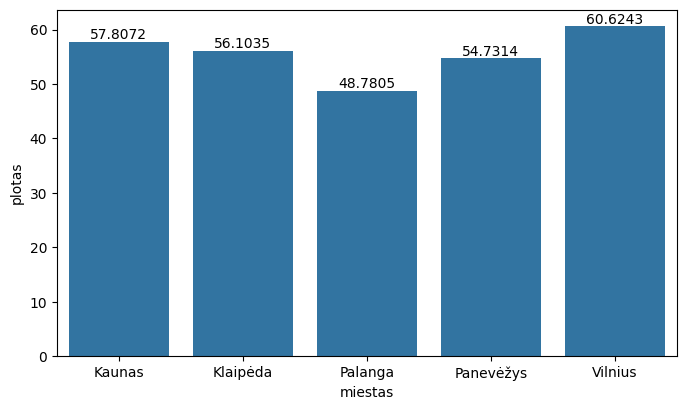

In [16]:
# Palyginkite vidutinį NT plotą tarp skirtingų miestų.
# Koks NT plotas yra dažniausiai pasitaikantis lyginamuose miestuose? 
# NT plotą apvalinkite 5 m2
# intervalais
df['plotas5'] = df[df['plotas'] != None]['plotas'].apply(lambda x: float(np.ceil(x/5) * 5))

df_plotas = df[df['miestas'].isin(miestai)][['miestas', 'plotas']]
df_plotas_gr = df_plotas.groupby('miestas').mean(numeric_only=True)

fig, ax = plt.subplots(figsize=(8, 4.5))
sns.barplot(data=df_plotas_gr, x='miestas', y='plotas')
for container in ax.containers:
    ax.bar_label(container)
plt.show()


In [21]:
# df_miestai = df[df['miestas'].isin(miestai)][['miestas', 'plotas5']]
# df_miestai.groupby(['miestas']).count().unstack()

         miestas  
plotas5  Kaunas       1070
         Klaipėda      794
         Palanga       573
         Panevėžys     221
         Vilnius      3071
dtype: int64

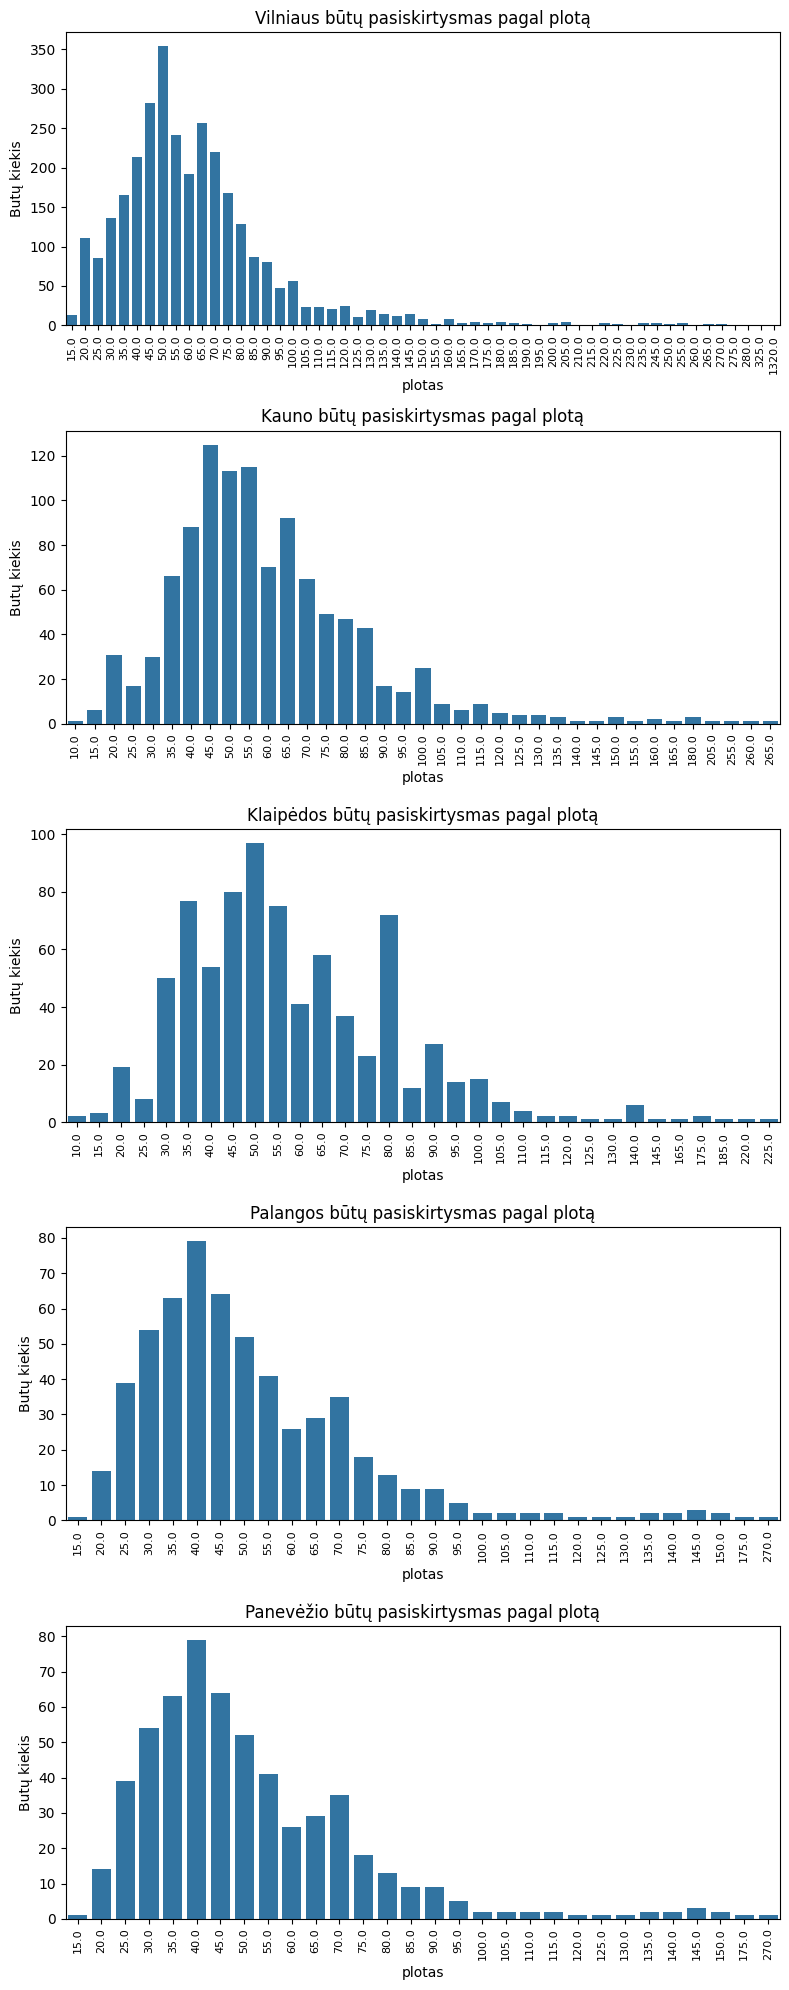

In [46]:
# Group by city and apartment area, then count occurrences
# df_miestai = df[df['miestas'].isin(miestai)].groupby(['miestas', 'plotas5']).size().reset_index(name='Count')
df_vln = df[df['miestas'] == 'Vilnius'].groupby(['plotas5']).size().reset_index(name='Count')
df_kns = df[df['miestas'] == 'Kaunas'].groupby(['plotas5']).size().reset_index(name='Count')
df_klp = df[df['miestas'] == 'Klaipėda'].groupby(['plotas5']).size().reset_index(name='Count')
df_pal = df[df['miestas'] == 'Palanga'].groupby(['plotas5']).size().reset_index(name='Count')
df_pan = df[df['miestas'] == 'Panavėžys'].groupby(['plotas5']).size().reset_index(name='Count')


# Find the most common apartment area in each city
# most_common = df_miestai.loc[df_miestai.groupby('miestas')['Count'].idxmax()]

# print(most_common)

# # Optional: Visualize the results
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5,1,figsize=(8, 20))

sns.barplot(data=df_vln, x='plotas5', y='Count', ax=ax1)
ax1.tick_params(axis='x', rotation=90, labelsize=8)
ax1.set_ylabel('Butų kiekis')
ax1.set_xlabel('plotas')
ax1.set_title('Vilniaus būtų pasiskirtysmas pagal plotą')
# for container in ax1.containers:
#     ax1.bar_label(container)

sns.barplot(data=df_kns, x='plotas5', y='Count', ax=ax2)
ax2.tick_params(axis='x', rotation=90, labelsize=8)
ax2.set_ylabel('Butų kiekis')
ax2.set_xlabel('plotas')
ax2.set_title('Kauno būtų pasiskirtysmas pagal plotą')
# for container in ax1.containers:
#     ax1.bar_label(container)

sns.barplot(data=df_klp, x='plotas5', y='Count', ax=ax3)
ax3.tick_params(axis='x', rotation=90, labelsize=8)
ax3.set_ylabel('Butų kiekis')
ax3.set_xlabel('plotas')
ax3.set_title('Klaipėdos būtų pasiskirtysmas pagal plotą')
# for container in ax1.containers:
#     ax1.bar_label(container)

sns.barplot(data=df_pal, x='plotas5', y='Count', ax=ax4)
ax4.tick_params(axis='x', rotation=90, labelsize=8)
ax4.set_ylabel('Butų kiekis')
ax4.set_xlabel('plotas')
ax4.set_title('Palangos būtų pasiskirtysmas pagal plotą')
# for container in ax1.containers:
#     ax1.bar_label(container)

sns.barplot(data=df_pal, x='plotas5', y='Count', ax=ax5)
ax5.tick_params(axis='x', rotation=90, labelsize=8)
ax5.set_ylabel('Butų kiekis')
ax5.set_xlabel('plotas')
ax5.set_title('Panevėžio būtų pasiskirtysmas pagal plotą')
# for container in ax1.containers:
#     ax1.bar_label(container)


fig.tight_layout()
plt.show()
# B1 = ax.bar(most_common['miestas'], most_common['plotas5'])
# ax.bar_label(B1)
# ax.set_xlabel('Miestas')
# ax.set_ylabel('plotas')
# plt.title('Dažniausia pasitaikantis buto plotas miestuose')

# plt.show()

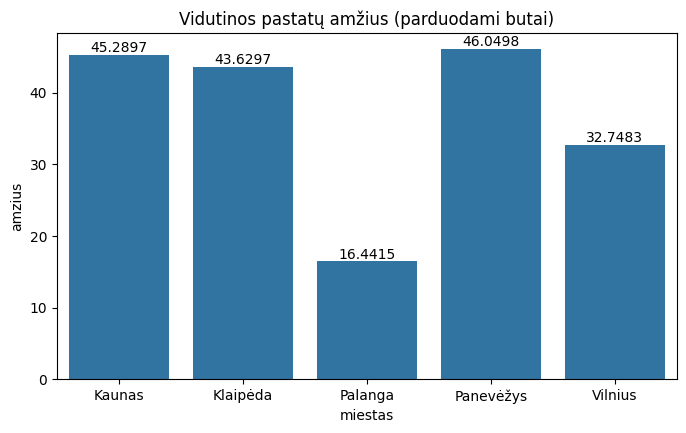

In [52]:
# Koks vidutinis amžius/statybos metai NT objektų? Ar yra skirtumas tarp nuomojamų bei parduodamų butų?

def amzius(x):
    return  2024 - int(x[:4])

df['amzius'] = df['Metai:'].apply(amzius)


df_amzius= df[df['miestas'].isin(miestai)][['miestas', 'amzius']]
df_amzius_gr = df_amzius.groupby('miestas').mean(numeric_only=True)

fig, ax = plt.subplots(figsize=(8, 4.5))
sns.barplot(data=df_amzius_gr, x='miestas', y='amzius')
ax.set_title('Vidutinos pastatų amžius (parduodami butai)')
for container in ax.containers:
    ax.bar_label(container)
plt.show()

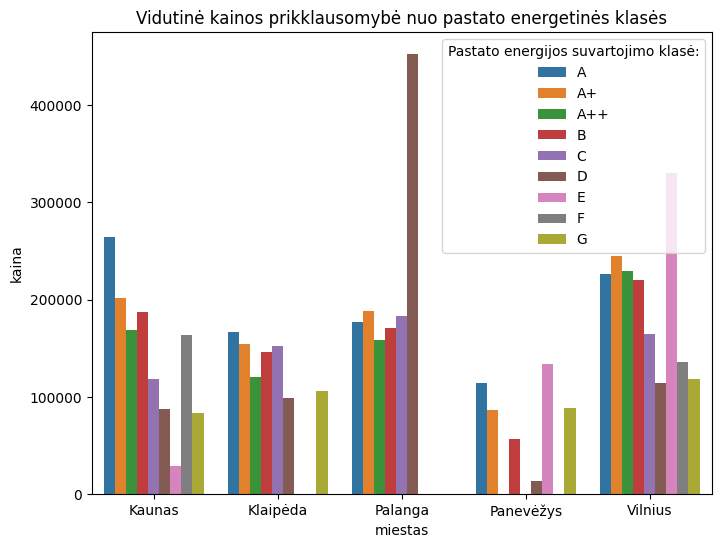

In [59]:
# Kaip priklauso vidutinė kaina nuo NT objektų energetinės klasės? (A, A+, A++)?

# df_energija= df[(df['miestas'].isin(miestai)) & (df['Pastato energijos suvartojimo klasė:' != None])][['miestas', 'Pastato energijos suvartojimo klasė:', 'kaina']]
df_energija= df[(df['miestas'].isin(miestai))][['miestas', 'Pastato energijos suvartojimo klasė:', 'kaina']]
df_energija_gr = df_energija.groupby(['miestas','Pastato energijos suvartojimo klasė:']).mean(numeric_only=True)

fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(data=df_energija_gr, x='miestas', y='kaina', hue='Pastato energijos suvartojimo klasė:')
ax.set_title('Vidutinė kainos prikklausomybė nuo pastato energetinės klasės')
# for container in ax.containers:
#     ax.bar_label(container)
plt.show()

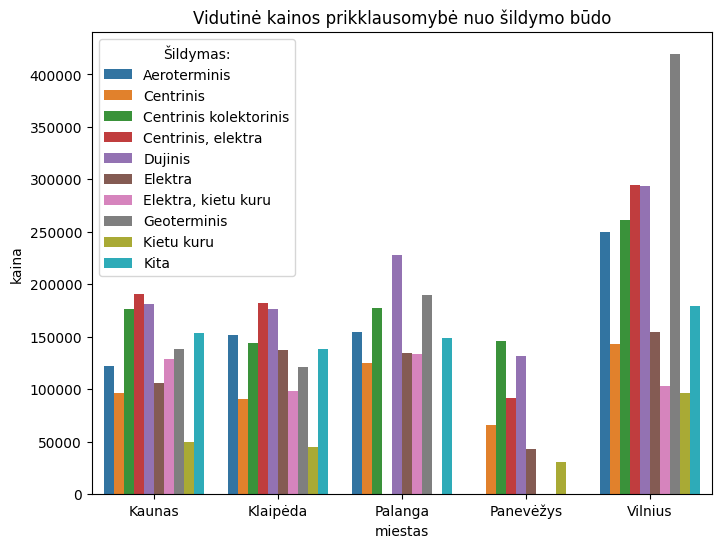

In [64]:
# Ar yra
# priklausomybė tarp vidutinės kainos ir įrengto šildymo (kolektorinis, centrinis, grindinis ...)?

sildymas = df[df['miestas'].isin(miestai)]['Šildymas:'].value_counts()
top10s = sildymas.head(10).index.to_list()

df_sildymas= df[(df['miestas'].isin(miestai)) & (df['Šildymas:'].isin(top10s))][['miestas', 'Šildymas:', 'kaina']]
df_sildymas_gr = df_sildymas.groupby(['miestas','Šildymas:']).mean(numeric_only=True)

fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(data=df_sildymas_gr, x='miestas', y='kaina', hue='Šildymas:')
ax.set_title('Vidutinė kainos prikklausomybė nuo šildymo būdo')
# for container in ax.containers:
#     ax.bar_label(container)
plt.show()

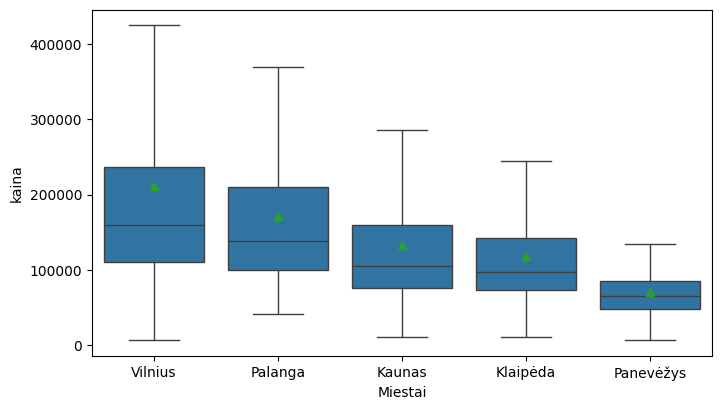

In [68]:
# Kuriuose lyginamuose miestuose didžiausias/mažiausias kainų išsibarstymas?

df_x = df[(df['miestas'].isin(miestai))]

fig, axes = plt.subplots(figsize=(8, 4.5))


sns.boxplot(data=df_x,x = 'miestas', y='kaina', showmeans=True, showfliers=False)
# axes.set_xticklabels(axes.get_xticklabels(), rotation=90)
axes.set(xlabel='Miestai',ylabel='kaina')
# for container in ax.containers:
#     ax.bar_label(container)
# axes.legend()
plt.show()

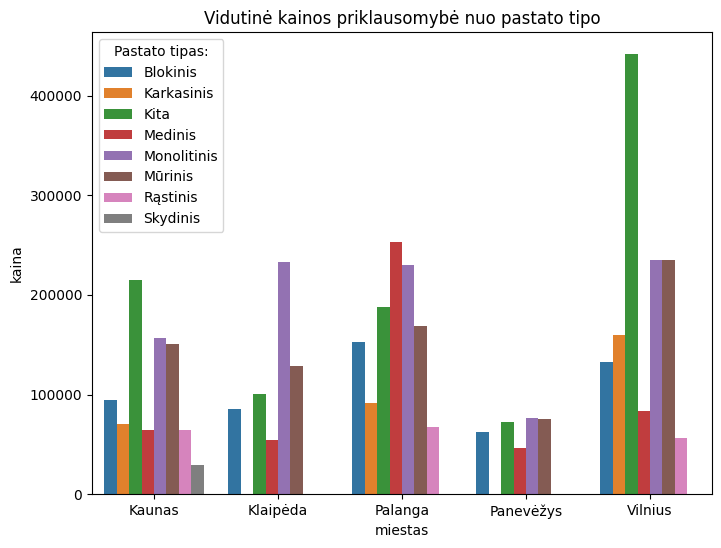

In [70]:
#  Ar yra kokia
# nors priklausomybė tarp kainos ir pastato tipo (Mūrinis, blokinis), pastato amžiaus?

df_tipas= df[(df['miestas'].isin(miestai))][['miestas', 'Pastato tipas:', 'kaina']]
df_tipas_gr = df_tipas.groupby(['miestas','Pastato tipas:']).mean(numeric_only=True)

fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(data=df_tipas_gr, x='miestas', y='kaina', hue='Pastato tipas:')
ax.set_title('Vidutinė kainos priklausomybė nuo pastato tipo')
# for container in ax.containers:
#     ax.bar_label(container)
plt.show()

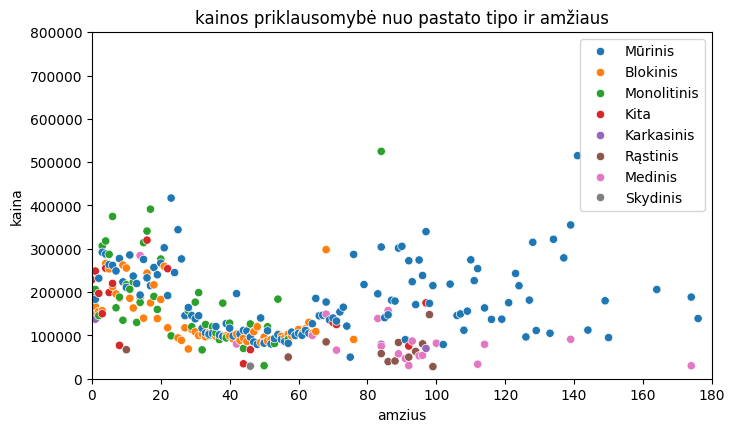

In [101]:
# df_amz= df[(df['miestas'].isin(miestai))][['miestas', 'amzius', 'kaina']]
# df_amz_gr = df_amz.groupby(['miestas','amzius']).mean(numeric_only=True)

# fig, ax = plt.subplots(figsize=(8, 6))
# sns.barplot(data=df_amz_gr, x='amzius', y='kaina')
# ax.set_title('Vidutinė kainos priklausomybė nuo pastato tipo')
# # for container in ax.containers:
# #     ax.bar_label(container)
# plt.show()


df_k = df[df['miestas'].isin(miestai)][['amzius', 'kaina', 'Pastato tipas:']].groupby(['amzius', 'Pastato tipas:']).mean(numeric_only=True).reset_index()

fig, axis = plt.subplots(figsize=(8,4.5))
#plotting code:

sns.scatterplot(data=df_k, x='amzius', y='kaina', hue='Pastato tipas:', ax=axis)
axis.set_xlim(0, 180)
axis.set_ylim(0, 800000)

axis.legend(loc='best')
plt.title('kainos priklausomybė nuo pastato tipo ir amžiaus')

plt.show()

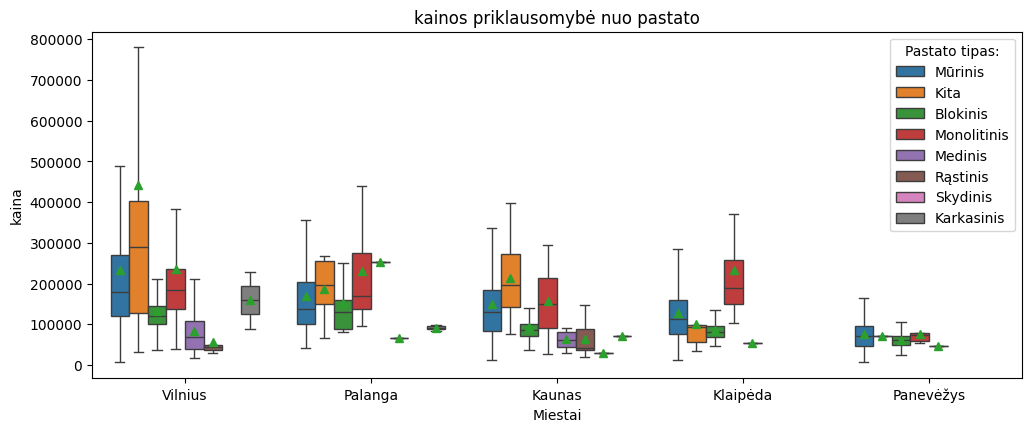

In [104]:
df_x = df[(df['miestas'].isin(miestai))]

fig, axes = plt.subplots(figsize=(12, 4.5))


sns.boxplot(data=df_x,x = 'miestas', y='kaina', hue='Pastato tipas:', showmeans=True, showfliers=False)
# axes.set_xticklabels(axes.get_xticklabels(), rotation=90)
axes.set(xlabel='Miestai',ylabel='kaina')
plt.title('kainos priklausomybė nuo pastato')
plt.show()

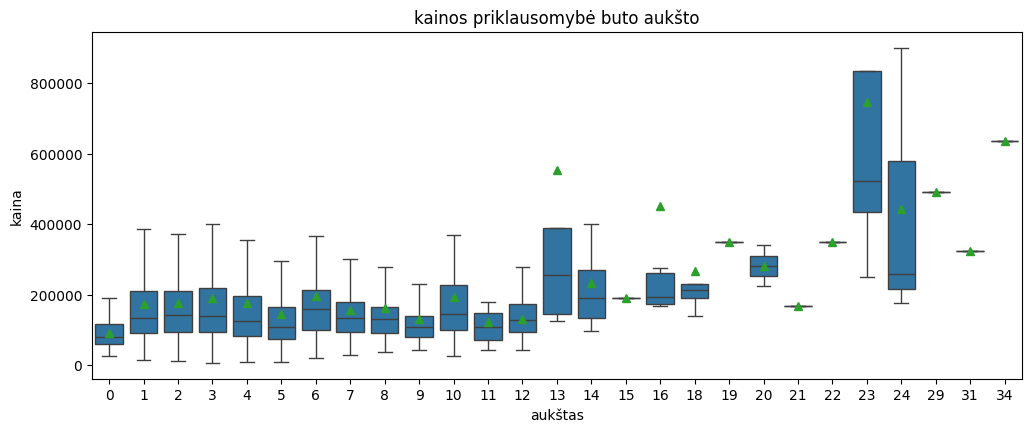

In [118]:
df_x = df[(df['miestas'].isin(miestai))]

order_str = sorted(df_x['Aukštas:'].unique())
order = sorted([int(x) for x in order_str])
order_str2 = [str(x) for x in order]

fig, axes = plt.subplots(figsize=(12, 4.5))


sns.boxplot(data=df_x,x = 'Aukštas:', y='kaina', showmeans=True, showfliers=False, order=order_str2)
# sns.boxplot(data=df_x,x = 'Aukštas:', y='kaina', showmeans=True, showfliers=False)
# axes.set_xticklabels(axes.get_xticklabels(), rotation=90)
axes.set(xlabel='aukštas',ylabel='kaina')
plt.title('kainos priklausomybė buto aukšto')
plt.show()

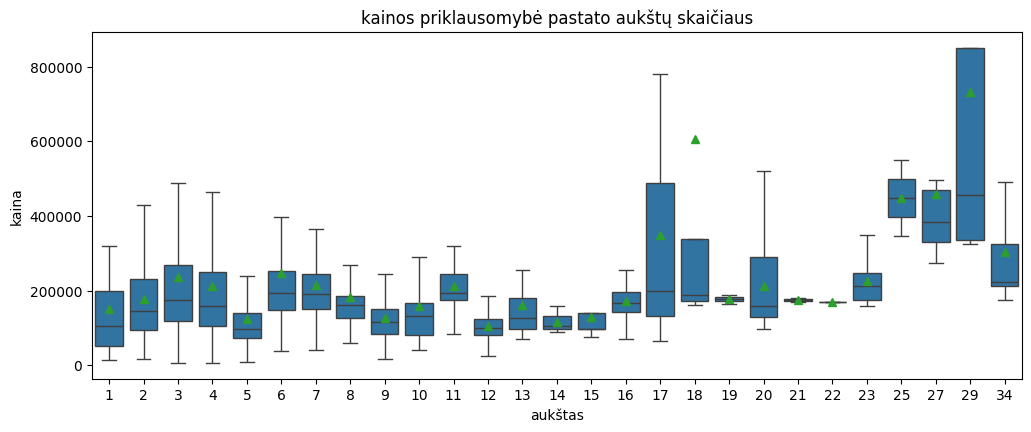

In [119]:
df_x = df[(df['miestas'].isin(miestai))]

order_str = sorted(df_x['Aukštų sk.:'].unique())
order = sorted([int(x) for x in order_str])
order_str2 = [str(x) for x in order]

fig, axes = plt.subplots(figsize=(12, 4.5))


sns.boxplot(data=df_x,x = 'Aukštų sk.:', y='kaina', showmeans=True, showfliers=False, order=order_str2)
# sns.boxplot(data=df_x,x = 'Aukštas:', y='kaina', showmeans=True, showfliers=False)
# axes.set_xticklabels(axes.get_xticklabels(), rotation=90)
axes.set(xlabel='aukštas',ylabel='kaina')
plt.title('kainos priklausomybė pastato aukštų skaičiaus')
plt.show()

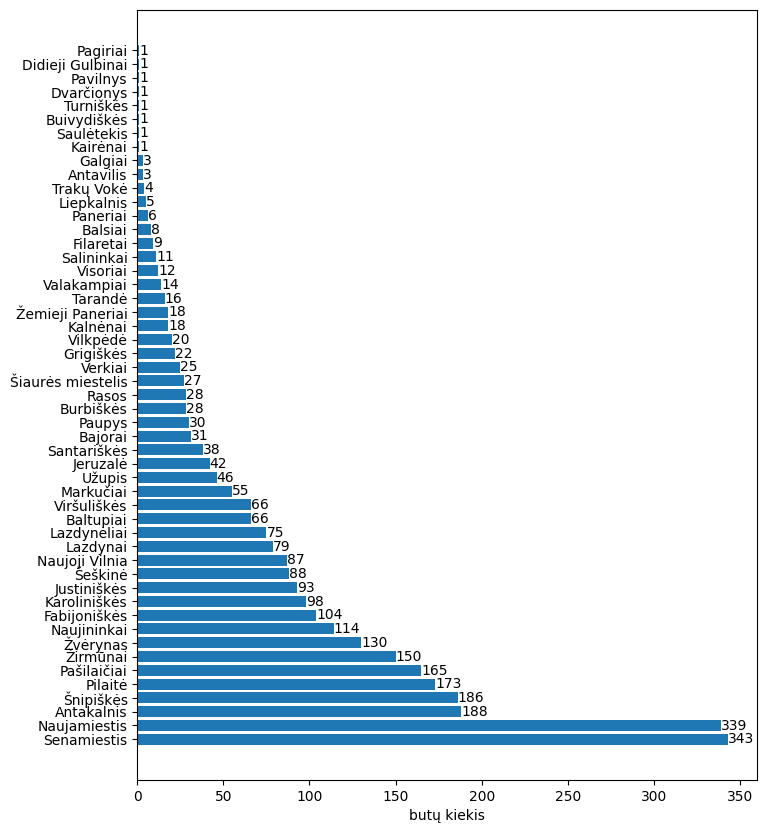

In [134]:
# rajonas = df[(df['miestas'] == 'Vilnius')&(df['rajonas'] != None)]['rajonas'].value_counts()
rajonas = df[(df['miestas'] == 'Vilnius')]['rajonas'].value_counts()
fig, ax = plt.subplots(figsize=(8, 10))
B1 = ax.barh(rajonas.index, rajonas.values)
ax.bar_label(B1)
# ax.tick_params(axis='x', label='butų kiekis')
ax.set_xlabel('butų kiekis')
plt.show()

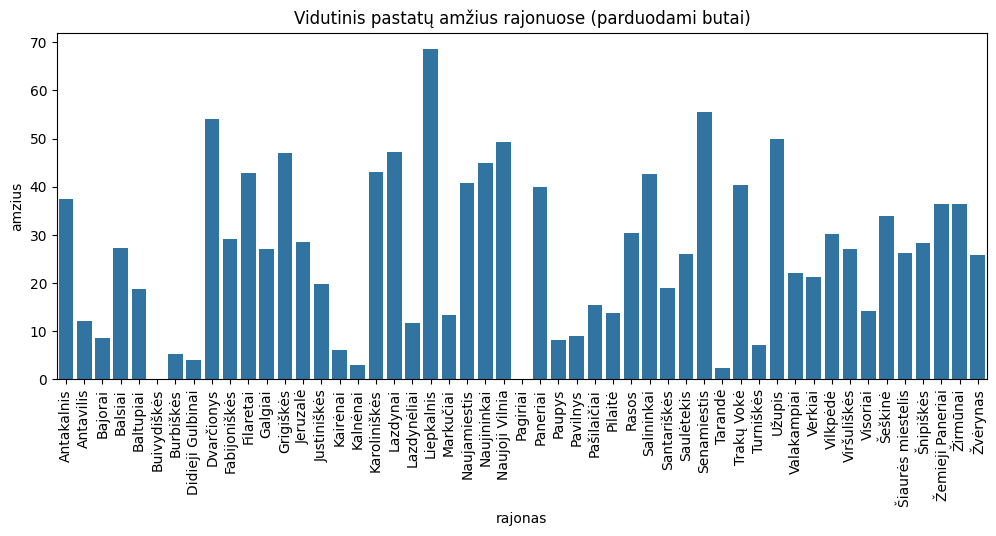

In [139]:
rajonas_amz= df[(df['miestas'] == 'Vilnius')][['rajonas', 'amzius']]
rajonas_amz_gr = rajonas_amz.groupby('rajonas').mean(numeric_only=True)

fig, ax = plt.subplots(figsize=(12, 4.5))
sns.barplot(data=rajonas_amz_gr, x='rajonas', y='amzius')
ax.set_title('Vidutinis pastatų amžius rajonuose (parduodami butai)')
ax.tick_params(axis='x', rotation=90)
# for container in ax.containers:
#     ax.bar_label(container)
plt.show()

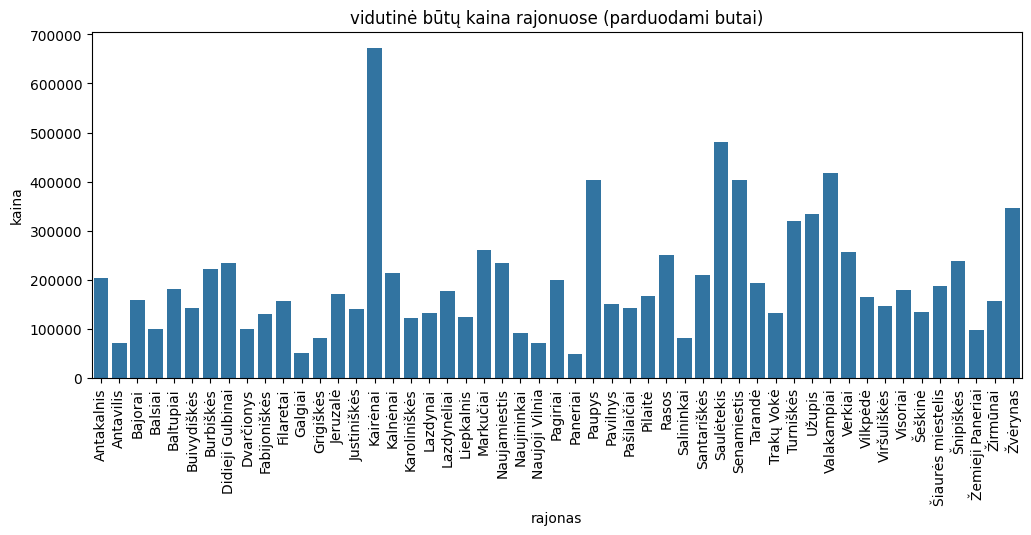

In [140]:
rajonas_amz= df[(df['miestas'] == 'Vilnius')][['rajonas', 'kaina']]
rajonas_amz_gr = rajonas_amz.groupby('rajonas').mean(numeric_only=True)

fig, ax = plt.subplots(figsize=(12, 4.5))
sns.barplot(data=rajonas_amz_gr, x='rajonas', y='kaina')
ax.set_title('vidutinė būtų kaina rajonuose (parduodami butai)')
ax.tick_params(axis='x', rotation=90)
# for container in ax.containers:
#     ax.bar_label(container)
plt.show()